In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [96]:
data = pd.read_csv('fake_or_real_news.csv')
data.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [97]:
data['label'] = data['label'].map({'REAL': 1, 'FAKE': 0})
data.head()


,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1


In [98]:
data.shape

(6335, 4)

In [99]:
count=data['label'].value_counts()
count

,count
label,
1,3171
0,3164


In [100]:
null_values=data.isnull().sum()

In [101]:
print('There are {} missing values for {} and {} missing values for {}.'.format(null_values[0],null_values.index[0],null_values[1],null_values.index[1]))


There are 0 missing values for Unnamed: 0 and 0 missing values for title.


<ipython-input-101-5d7a3fbb60f7>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('There are {} missing values for {} and {} missing values for {}.'.format(null_values[0],null_values.index[0],null_values[1],null_values.index[1]))


In [102]:
num_duplicate=data.duplicated().sum()
print('There are {} duplicate reviews present in the dataset'.format(num_duplicate))

There are 0 duplicate reviews present in the dataset


In [104]:
text=data['text']
duplicated_text=data[text.isin(text[text.duplicated()])].sort_values('text')
duplicated_text.head()

,Unnamed: 0,title,text,label
5028,10386,Israeli Minister sparks Scandal after showing ...,"\nTwo earthquakes, which struck Italy this wee...",0
4894,10008,Israeli Minister sparks Scandal after showing ...,"\nTwo earthquakes, which struck Italy this wee...",0
4744,8548,A Mormon Reader Says Most Mormons Will Still B...,,0
4713,8626,World War 3?,,0
710,8332,MARKETWATCH LEFTIST: MSM’s “Blatant” Anti Trum...,,0


In [105]:
data.drop_duplicates(inplace=True)

In [106]:
data_copy=data.copy()

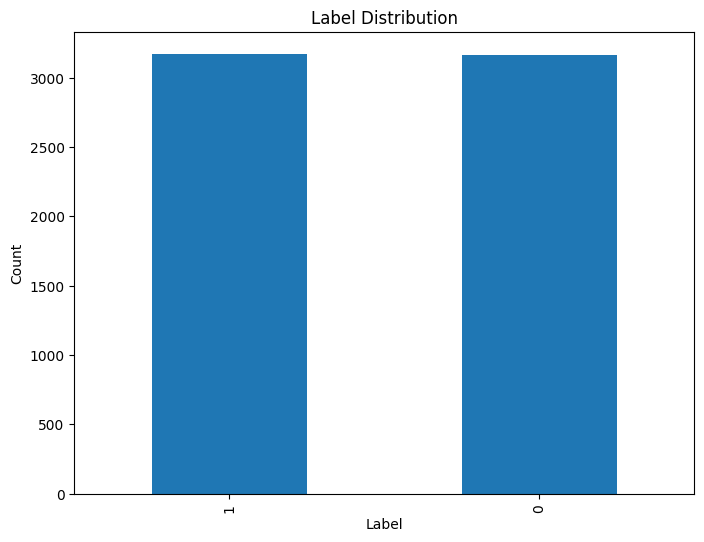

In [107]:
plt.figure(figsize=(8,6))
count.plot(kind='bar')
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [108]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['label'] = le.fit_transform(data['label'])
data.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1


In [109]:
x=data['text']
y=data['label']

In [110]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [111]:
y_test.shape

(1267,)

In [112]:
#Bag of words
X_train = X_train.fillna('')
X_test = X_test.fillna('')

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB

vectorizer=CountVectorizer()
X_train_BOW=vectorizer.fit_transform(X_train)
X_test_BOW=vectorizer.transform(X_test)

In [113]:
model_BOW=MultinomialNB()
model_BOW.fit(X_train_BOW,y_train)

MultinomialNB()

In [114]:
y_pred_BOW=model_BOW.predict(X_test_BOW)
accuracy_BOW=accuracy_score(y_test,y_pred_BOW)
print('Accuracy of the model is:',accuracy_BOW)

Accuracy of the model is: 0.898973954222573


In [115]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_pred_BOW)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.87      0.89       628
           1       0.88      0.93      0.90       639

    accuracy                           0.90      1267
   macro avg       0.90      0.90      0.90      1267
weighted avg       0.90      0.90      0.90      1267



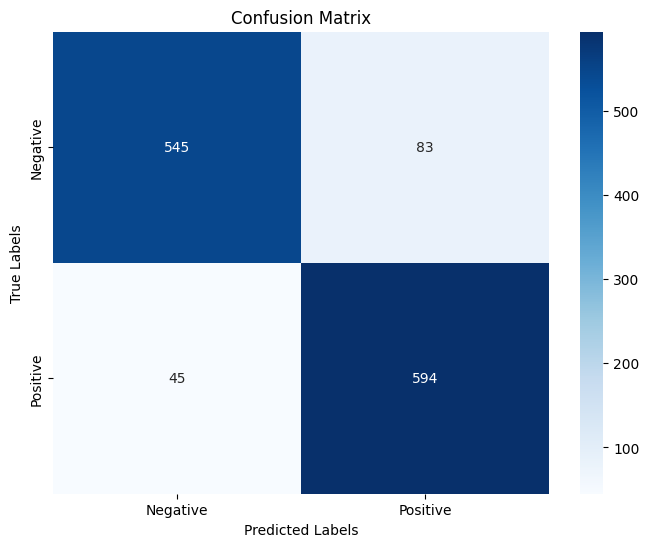

In [116]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

confusion_matrix=confusion_matrix(y_test,y_pred_BOW)
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [120]:
text="The Indian Space Research Organisation or is the national space agency of India, headquartered in Bengaluru. It operates under Department of Space which is directly overseen by the Prime Minister of India while Chairman of ISRO acts as executive of DOS as well."
sentiment=model_BOW.predict(vectorizer.transform([text]))
print(sentiment)

[0]


In [126]:
text="U.S. Secretary of State John F. Kerry said Monday that he will stop in Paris later this week, amid criticism that no top American officials attended Sunday’s unity march against terrorism. Kerry said he expects to arrive in Paris Thursday evening, as he heads home after a week abroad."
sentiment=model_BOW.predict(vectorizer.transform([text]))
print(sentiment)

[1]


In [136]:
!pip install gensim


In [140]:
from sklearn.manifold import TSNE

import gensim.downloader as api

glove_model=api.load('glove-wiki-gigaword-300')

[==================================================] 100.0% 376.1/376.1MB downloaded


In [149]:
from sklearn.naive_bayes import MultinomialNB

def get_glove_vector(review, glove_model, embedding_dim=300):
    tokens = review.split()  # Tokenize the text
    vectors = [glove_model[word] for word in tokens if word in glove_model]
    if len(vectors) == 0:
        return np.zeros(embedding_dim)  # Return a zero vector if no valid words
    else:
        return np.mean(vectors, axis=0)  # Average the GloVe vectors

In [150]:
embedding_dim = 300
x = np.array([get_glove_vector(review, glove_model, embedding_dim) for review in data["text"]])
y = data["label"].values

In [152]:
from functools import partial

# Define a new function that takes only the review as argument
get_glove_vector_partial = partial(get_glove_vector, glove_model=glove_model, embedding_dim=embedding_dim)

# Now apply this function to your data
X_train_glove = np.vstack(X_train.apply(get_glove_vector_partial))
X_test_glove = np.vstack(X_test.apply(get_glove_vector_partial))

In [153]:
from sklearn.linear_model import LogisticRegression
model_glove = LogisticRegression(max_iter=500)
model_glove.fit(X_train_glove, y_train)

LogisticRegression(max_iter=500)

In [154]:
y_pred_glove = model_glove.predict(X_test_glove)
accuracy_glove = accuracy_score(y_test, y_pred_glove)
print("GloVe Accuracy:", accuracy_glove)

GloVe Accuracy: 0.8681925808997633


In [155]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_pred_glove)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.86      0.87       628
           1       0.86      0.88      0.87       639

    accuracy                           0.87      1267
   macro avg       0.87      0.87      0.87      1267
weighted avg       0.87      0.87      0.87      1267



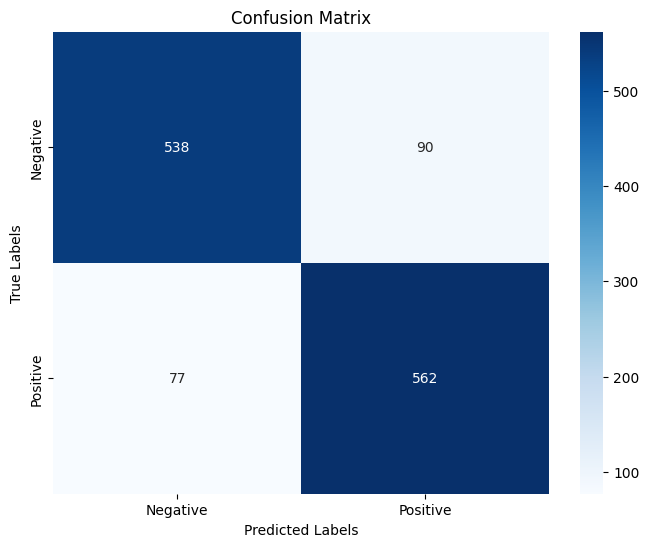

In [156]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

confusion_matrix=confusion_matrix(y_test,y_pred_glove)
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [157]:
text="The Indian Space Research Organisation or is the national space agency of India, headquartered in Bengaluru. It operates under Department of Space which is directly overseen by the Prime Minister of India while Chairman of ISRO acts as executive of DOS as well."
sentiment=model_glove.predict(np.array([get_glove_vector(text, glove_model, embedding_dim)]))
print(sentiment)

[0]


In [158]:
text="U.S. Secretary of State John F. Kerry said Monday that he will stop in Paris later this week, amid criticism that no top American officials attended Sunday’s unity march against terrorism. Kerry said he expects to arrive in Paris Thursday evening, as he heads home after a week"
sentiment=model_glove.predict(np.array([get_glove_vector(text, glove_model, embedding_dim)]))
print(sentiment)

[1]


In [159]:
#word2vec
from gensim.models import Word2Vec
sentences=[review.split() for review in X_train]
word2vec_model=Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

In [166]:
def get_word2vec_vector(text):
    words = text.split()
    vectors = [word2vec_model.wv[word] if word in word2vec_model.wv else np.zeros(100) for word in words]
    if len(vectors) == 0:
        return np.zeros(100)
    return np.mean(vectors, axis=0)

In [167]:
X_train_word2vec=np.vstack(X_train.apply(get_word2vec_vector))
X_test_word2vec=np.vstack(X_test.apply(get_word2vec_vector))

In [169]:
model_word2vec=LogisticRegression(max_iter=200)
model_word2vec.fit(X_train_word2vec,y_train)

LogisticRegression(max_iter=200)

In [171]:
y_pred_word2vec=model_word2vec.predict(X_test_word2vec)
accuracy_word2vec=accuracy_score(y_test,y_pred_word2vec)
print('Accuracy of the word2vec model is:',accuracy_word2vec)

Accuracy of the word2vec model is: 0.8981846882399369


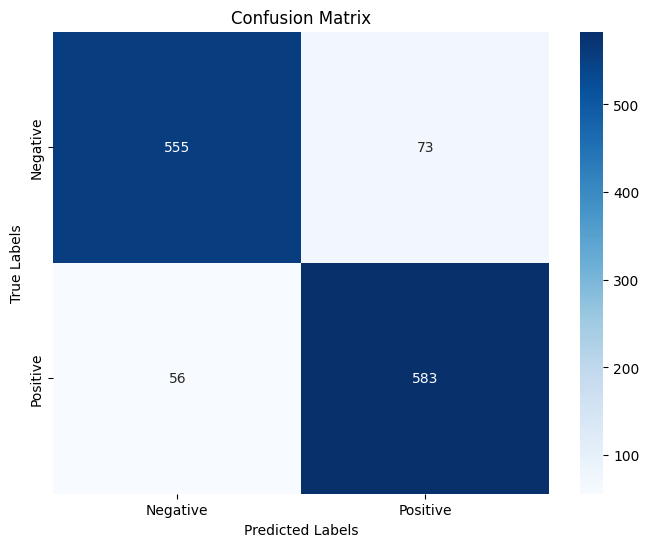

In [172]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

confusion_matrix=confusion_matrix(y_test,y_pred_word2vec)
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [173]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred_word2vec)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.88      0.90       628
           1       0.89      0.91      0.90       639

    accuracy                           0.90      1267
   macro avg       0.90      0.90      0.90      1267
weighted avg       0.90      0.90      0.90      1267



In [175]:
text="The Indian Space Research Organisation or is the national space agency of India, headquartered in Bengaluru. It operates under Department of Space which is directly overseen by the Prime Minister of India while Chairman of ISRO acts as executive of DOS as well."
sentiment = model_word2vec.predict(get_word2vec_vector(text).reshape(1, -1))
print( sentiment)


[0]


In [176]:
text="U.S. Secretary of State John F. Kerry said Monday that he will stop in Paris later this week, amid criticism that no top American officials attended Sunday’s unity march against terrorism. Kerry said he expects to arrive in Paris Thursday evening, as he heads home after a week"
sentiment = model_word2vec.predict(get_word2vec_vector(text).reshape(1, -1))
print( sentiment)

[1]


In [177]:
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import Trainer, TrainingArguments

import torch
from torch.utils.data import Dataset
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [178]:
class NewsDataset(Dataset):
    def __init__(self, texts, labels):
        self.texts = texts.tolist()  # Ensure texts are in list format
        self.labels = labels.tolist()  # Ensure labels are in list format

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        encoding = tokenizer(
            text,
            padding="max_length",  # Pad all sequences to the max length
            truncation=True,       # Truncate sequences longer than max length
            max_length=128,        # Set the max sequence length
            return_tensors="pt"    # Return PyTorch tensors
        )
        # Squeeze to remove unnecessary dimensions and include 'labels' in the output
        encoding = {key: val.squeeze(0) for key, val in encoding.items()}
        encoding['labels'] = torch.tensor(label)  # Add the label
        return encoding

In [179]:
train_dataset = NewsDataset(X_train, y_train)
test_dataset = NewsDataset(X_test, y_test)

In [180]:
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [181]:
training_args = TrainingArguments(
    output_dir="./results",             # Directory to save model checkpoints
    num_train_epochs=1,                 # Number of training epochs
    per_device_train_batch_size=2,      # Batch size for training
    per_device_eval_batch_size=4,       # Batch size for evaluation
    warmup_steps=500,                   # Number of warmup steps
    max_steps=1000,         # Train for only 1000 steps
    weight_decay=0.01,                  # Weight decay for regularization
    logging_dir="./logs",               # Directory to save logs
    evaluation_strategy="epoch",        # Evaluate at the end of every epoch
    report_to="none"
)

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [183]:
!pip install transformers

In [188]:
from transformers import pipeline
import pandas as pd

# Load the dataset

df = pd.read_csv('fake_or_real_news.csv')
# Load the sentiment-analysis pipeline with a pre-trained BERT model
sentiment_analyzer = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

# Select a small sample for testing
sample_data = data.sample(100, random_state=42)  # Take a sample of 100 rows
sample_news = sample_data['text'].tolist()

# Perform sentiment analysis on the sample reviews, limiting the sequence length
predictions = []
for review in sample_news:
    prediction = sentiment_analyzer(review, truncation=True, max_length=512) #add truncation and max_length arguments
    predictions.extend(prediction)

# Add predictions to the sample data
sample_data['predicted_sentiment'] = [pred['label'] for pred in predictions]
sample_data['predicted_score'] = [pred['score'] for pred in predictions]

# Save the results to a CSV
sample_data[['text', 'label', 'predicted_sentiment', 'predicted_score']].to_csv("sample_predictions.csv", index=False)


Device set to use cpu


In [189]:
sample_data=pd.read_csv('sample_predictions.csv')
sample_data.head()

,text,label,predicted_sentiment,predicted_score
0,Will Trump pull a Brexit times ten? What would...,0,1 star,0.287731
1,Clintons Are Under Multiple FBI Investigations...,0,1 star,0.276309
2,Dispatches from Eric Zuesse This piece is cros...,0,1 star,0.312275
3,Print \n[Ed. – Every now and then the facade c...,0,1 star,0.447700
4,Nanny In Jail After Force Feeding Baby To Deat...,0,1 star,0.513955


In [190]:
text="The Indian Space Research Organisation or is the national space agency of India, headquartered in Bengaluru. It operates under Department of Space which is directly overseen by the Prime Minister of India while Chairman of ISRO acts as executive of DOS as well."
prediction=sentiment_analyzer(text)
print(f"Text:",{text})
print(f"Sentiment:",{prediction[0]['label']})
print(f"Confidence Score: {prediction[0]['score']:.2f}")

Text: {'The Indian Space Research Organisation or is the national space agency of India, headquartered in Bengaluru. It operates under Department of Space which is directly overseen by the Prime Minister of India while Chairman of ISRO acts as executive of DOS as well.'}
Sentiment: {'4 stars'}
Confidence Score: 0.34


In [193]:
text="U.S. Secretary of State John F. Kerry said Monday that he will stop in Paris later this week, amid criticism that no top American officials attended Sunday’s unity march against terrorism. Kerry said he expects to arrive in Paris Thursday evening, as he heads home after a week"
prediction=sentiment_analyzer(text)
print(f"Text:",{text})
print(f"Sentiment:",{prediction[0]['label']})
print(f"Confidence Score: {prediction[0]['score']:.2f}")

Text: {'U.S. Secretary of State John F. Kerry said Monday that he will stop in Paris later this week, amid criticism that no top American officials attended Sunday’s unity march against terrorism. Kerry said he expects to arrive in Paris Thursday evening, as he heads home after a week'}
Sentiment: {'1 star'}
Confidence Score: 0.37
